In [17]:
import pandas as pd
import matplotlib.pyplot as plt

#Template for operation

'''data_path='ipl.csv'

data=pd.read_csv(data_path)		
print(data.describe())

col=data.columns

print(col)

plt.show()'''

'''df = pd.DataFrame({
    'name':['john','mary','peter','jeff','bill','lisa','jose'],
    'age':[23,78,22,19,45,33,20],
    'gender':['M','F','M','M','M','F','M'],
    'state':['california','dc','california','dc','california','texas','texas'],
    'num_children':[2,0,0,3,2,1,4],
    'num_pets':[5,1,0,5,2,2,3]
})

ax = plt.gca()

df.plot(kind='line',x='name',y='num_children',ax=ax)
df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)

plt.show()'''

"df = pd.DataFrame({\n    'name':['john','mary','peter','jeff','bill','lisa','jose'],\n    'age':[23,78,22,19,45,33,20],\n    'gender':['M','F','M','M','M','F','M'],\n    'state':['california','dc','california','dc','california','texas','texas'],\n    'num_children':[2,0,0,3,2,1,4],\n    'num_pets':[5,1,0,5,2,2,3]\n})\n\nax = plt.gca()\n\ndf.plot(kind='line',x='name',y='num_children',ax=ax)\ndf.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)\n\nplt.show()"

In [44]:
fname=input("Enter filename:")

fread=open(fname,"r")

data=fread.readlines() 

datadict={} #Dictionary for dataframe
xlabels=[] #List for xlabels

Enter filename:hello2.txt


In [45]:
#def WordParseEngine(word):

word=''
for line in data:
    l=len(line)
    if(l==1):
        continue
    for i in range(l):
        if line[i]=='.' or line[i]==',' or line[i]==';' or line[i]=='-' or line[i]==':' or line[i]=='?':
            line.replace(line[i],' ')
        if line[i]=='\\' and (line[i+1]=='n' or line[i+1]=='t'):
            line.replace(line[i],' ')
            line.replace(line[i+1],' ')
        if line[i]==' ':
            word=word.lower()
            word=word.strip()
            #print(word)
                
            if word in datadict:
                datadict[word]+=1
            else:
                datadict[word]=1
                xlabels.append(word)
            word=''
        else:
            word=word+line[i]
            
print(datadict)
print("\n",xlabels)
#sorted_dict = dict( sorted(datadict.items(),
                           #key=lambda item: item[1],
                           #reverse=True))

#print(sorted_dict)

{'introduction\nhave': 1, 'you': 42, 'ever': 1, 'wondered': 1, 'if': 7, 'there': 5, 'are': 20, 'any': 8, 'alternatives': 3, 'to': 44, 'software,': 2, 'just': 1, 'like': 7, 'linux-based': 1, 'operating': 2, 'systems': 3, 'free': 6, 'windows': 4, 'and': 48, 'mac': 1, 'os?': 1, 'sure': 1, 'are!': 1, 'these': 7, 'software': 13, 'called': 2, 'open': 6, 'source': 6, '(foss),': 1, 'the': 94, 'developers': 4, 'users': 1, 'identify': 2, 'themselves': 2, 'as': 15, 'foss': 21, 'community.': 1, 'hey': 1, 'everyone,': 1, 'this': 37, 'is': 41, 'ron': 1, 'here,': 1, 'in': 29, 'post,': 2, 'we’re': 2, 'gonna': 1, 'talk': 1, 'about': 8, '(foss)': 2, 'cyber': 25, 'security.\nfor': 1, 'geeks': 2, 'and/or': 2, 'professionals': 1, 'who': 7, 'wanna': 1, 'know': 4, 'exactly': 1, 'what': 7, 'kind': 1, 'of': 38, 'talking': 2, 'series-': 1, 'i’ll': 3, 'be': 12, 'used': 2, 'by': 9, 'blue': 1, 'teams': 1, 'a': 46, 'simulated': 1, 'pentesting': 2, 'drill.': 1, 'cover': 1, 'red-team': 1, 'security': 17, 'later': 1, 

In [46]:
df=pd.DataFrame.from_dict([datadict])
df.describe()
col=df.columns
df=df.transpose()
headd=df.head(10)

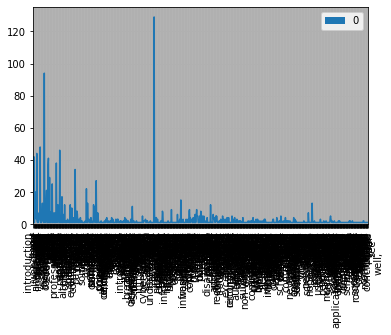

In [48]:
df.plot.bar(subplots = False, grid = True)
plt.plot(df)